<a href="https://colab.research.google.com/github/santiagoruizs/IML_Proyecto_Final/blob/master/colabs/Winee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O wine.csv 'https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Wine/winequality-red.csv'

--2020-07-15 10:16:09--  https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Wine/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>]  98.58K  --.-KB/s    in 0.01s   

2020-07-15 10:16:09 (8.03 MB/s) - ‘wine.csv’ saved [100951/100951]



In [ ]:
import pandas as pd
import numpy as np
import collections as cl

wine = pd.read_csv ('/content/wine.csv')

In [ ]:
wine.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

En donde:

- fixed acidity: todos los ácidos involucrados en la elaboración del vino. Valores normales oscilan entre 5,50 y 8,50 gramos por litro.

- volatile acidity: la cantidad de ácido acético, valores muy altos pueden llevar a un desagradable sabor a vinagre. Debe ser lo más bajo posible además de permanecer estable para ayudar en la conservación del vino. Varía entre rango de 0,6 a 0,9 gramos por ltr. 

- citric acid: en pequeñas cantidades, le da frescor y sabor al vino.

- Ph: describe cuan ácido o básico puede llegar a ser un vino en la escala de 0 (muy ácido)-14 (muy básico). Vinos Blancos: Oscilan entre 3.0 y 3.6. 
Vinos Tintos: Entre 3,4 y 3,8. Mayores niveles de pH, menores niveles de acidez y viceversa.

 El vino blanco/ verde se encuentra aproximadamente entre 3,0- 3.3


- free sulfur dioxide: permite el desarrollo de la fermentación alcohólica de forma regular, evitando las alteraciones provocadas por microorganismos no deseables que podrían acidificar el medio. Al embotellado, se reajusta a niveles de 30-35 miligramos por litro.

- total sulfur dioxide: lo mismo que arriba.

- Residual sugar: cantidad de azúcar que queda después de haber finalizado la fermentación primaria (alcohólica). Si queda más de la cuenta, puede refermentarse por microorganismos que no son deseables y producir vinagre

- Alcohol: La graduación de los vinos varía entre un 7 y un 16% de alcohol por volumen, aunque la mayoría de los vinos embotellados oscilan entre 10 y 14 grados. Los vinos dulces tienen entre un 15 y 22%

- Quality: clasificado entre 0 (Muy malo) y 10 (excelente)

In [ ]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#No hay nans, por suerte

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Valores promedio de cada métrica por calidad

valores más altos de ácido acético en vinos de menor calidad, pasa lo inverso con los cítricos (que sí le dan buen sabor)

In [ ]:
wine.groupby('quality').mean ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


#El dataset contiene más vinos en rangos regulares que muy buenos o muy malos.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Wines')

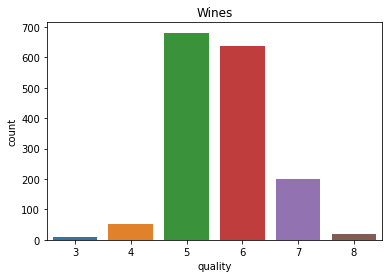

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = sns.countplot(data=wine, x="quality")
plt.title("Wines")

#En la siguiente gráfica vemos cómo influyen los niveles de ácidez en los vinos, si son en grandes cantidades, tendrán un desagradable sabor a vinagre. 

#En cambio, el ácido cítrico en cantidades moderadas, le da frescor y sabor al vino.






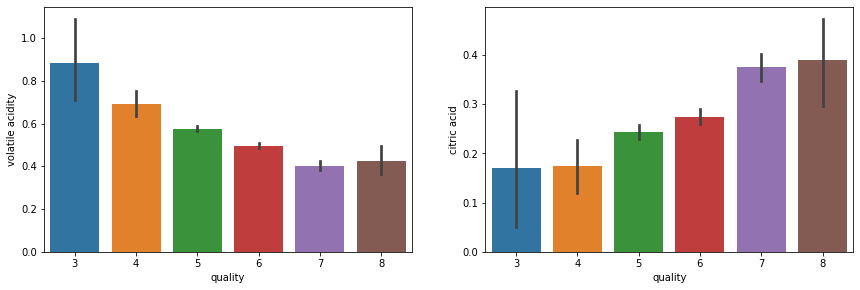

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
sns.barplot(data=wine, x="quality", y="volatile acidity",ax=ax1)
sns.barplot(data=wine, x="quality", y="citric acid",ax=ax2)

#También existe una correlación que a mayor nivel de ácidez en la fruta, menores valores de pH.

#Mayores niveles de pH, menores niveles de ácidez.

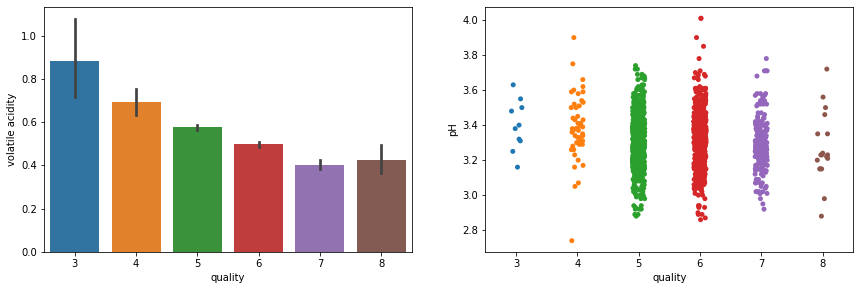

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
sns.barplot(data=wine, x="quality", y="volatile acidity",ax=ax1)
sns.stripplot(data=wine, x="quality", y="pH",ax=ax2)

#Dióxido de azufre y Sulfatos

#Se utilizan como conservantes en el vino, previenen el crecimiento microbial y la oxidación del vino.

Al embotellado, se reajusta a niveles de 30-35 miligramos por litro.


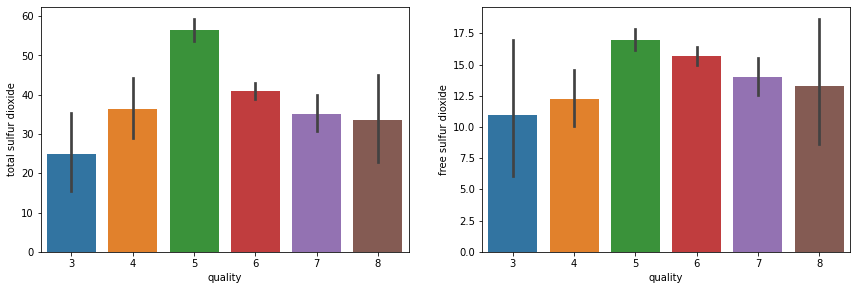

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14.5, 4.5)
sns.barplot(data=wine, x="quality", y="total sulfur dioxide",ax=ax1)
sns.barplot(data=wine, x="quality", y="free sulfur dioxide",ax=ax2)




#Para agrupar las puntuaciones de calidad, creamos otra columna de Puntuación Final.

- 1- Malo   (calidad 1-4)
- 2- Regular (calidad 5-7)
- 3- Excelente (calidad 8-10)





In [ ]:
score = []
for i in wine['quality']:
    if i >= 1 and i <= 4:
        score.append('1')
    elif i >= 5 and i <= 7:
        score.append('2')
    elif i >= 8 and i <= 10:
        score.append('3')
wine['Score'] = score

In [ ]:

cl.Counter(wine['Score'])

Counter({'1': 63, '2': 1518, '3': 18})

In [ ]:
X = wine.iloc [:,0:11]
y = wine['Score'] 

from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

#Análisis de eliminación de features

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE

svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=7, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Ranking of the features: {}'.format(rfe.ranking_))

Kept features: [False  True  True  True  True False False False  True  True  True]
Ranking of the features: [2 1 1 1 1 4 5 3 1 1 1]


In [ ]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
#selectedfeatures: 'volatile acidity', 'citric acid', 'residual sugar',
       #'chlorides','density','pH', 'sulphates', 'alcohol'

Xr= wine.drop (['fixed acidity','free sulfur dioxide', 'total sulfur dioxide', 'density','quality','Score'], axis =1)
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(Xr)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


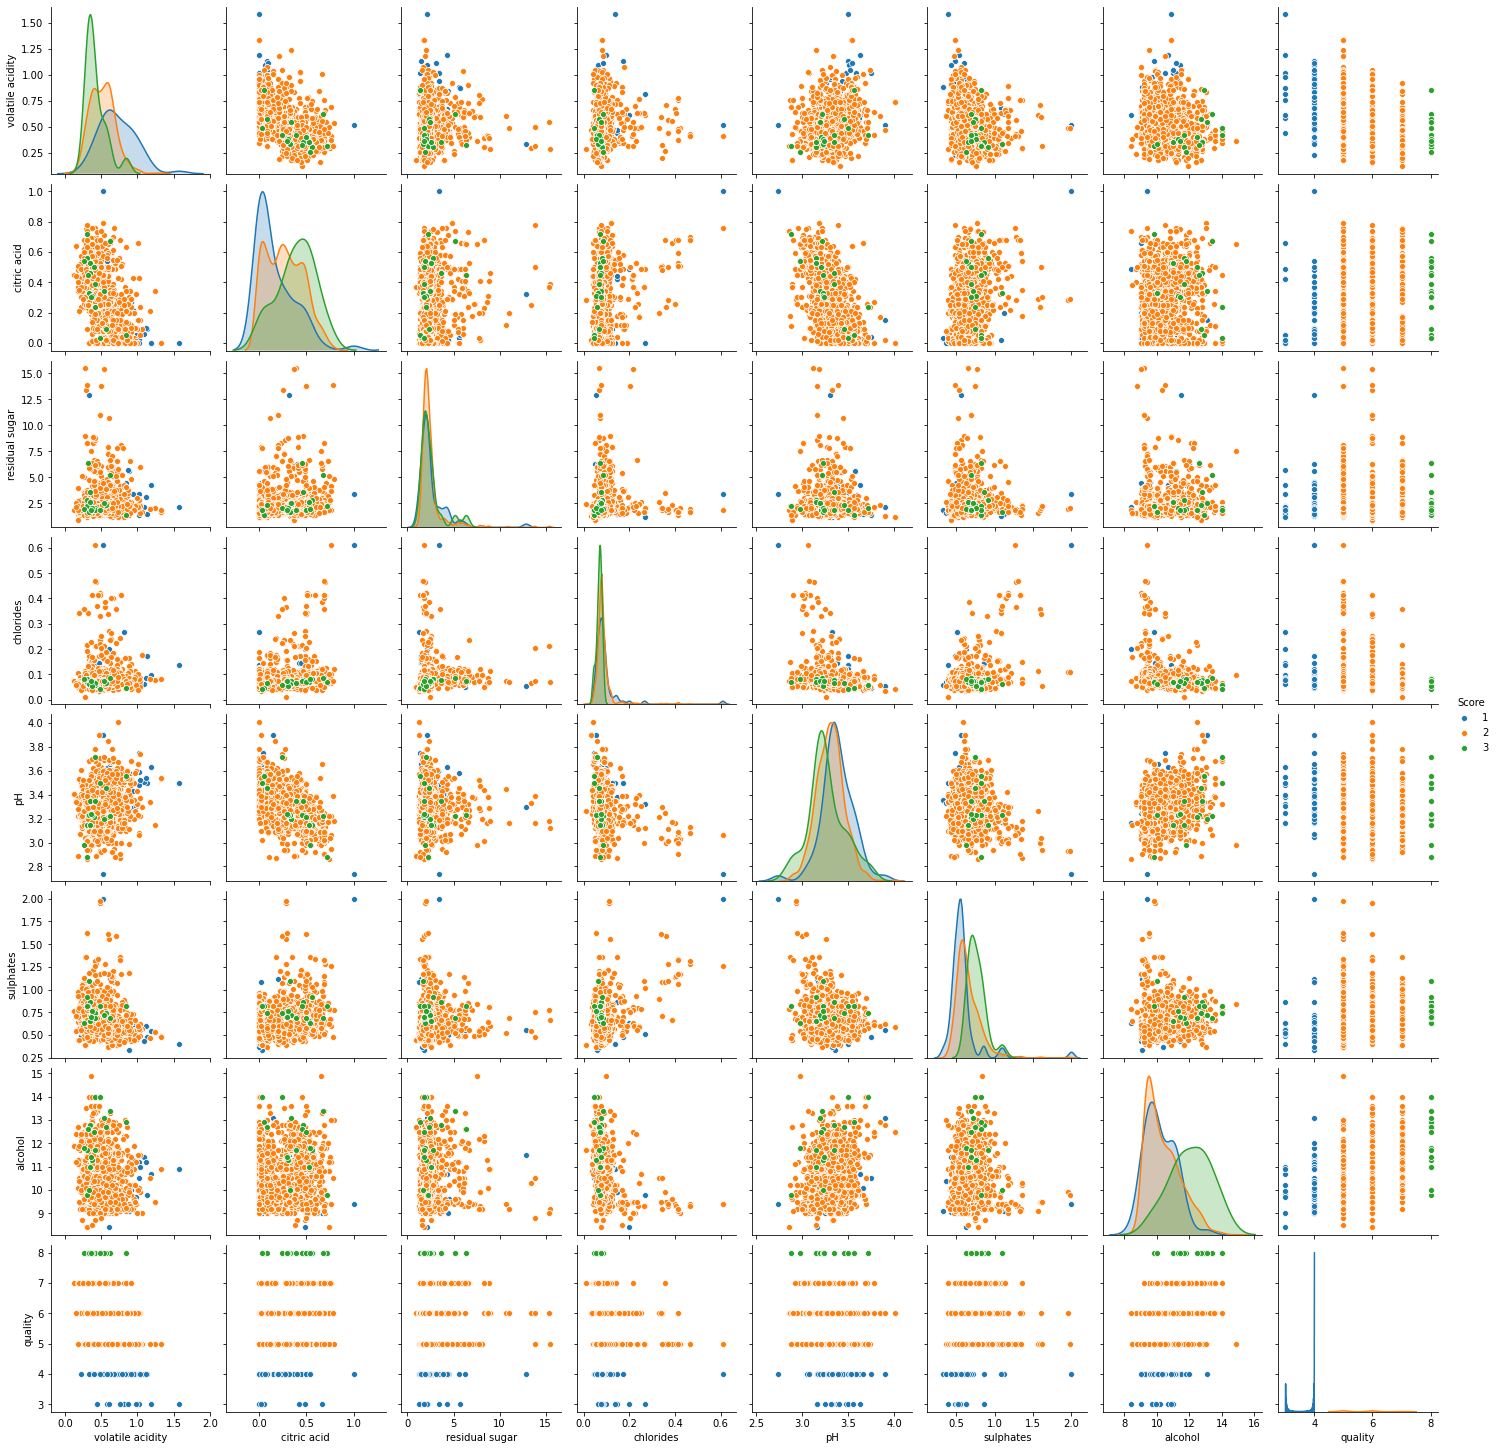

In [ ]:
import seaborn as sns
sns.pairplot(Xr,hue="Score")

#Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xr, y, test_size=0.2, random_state=20)

#Modeling

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

RFC = RandomForestClassifier(max_depth = 5, min_samples_split = 6, n_estimators = 500,random_state = 20, n_jobs = -1)
RFC.fit(x_train, y_train) 
train_prediction = RFC.predict(x_train)
print("La accuracy es de {}.".format(accuracy_score(y_train,train_prediction)))
print(classification_report(y_train, train_prediction))

La accuracy es de 0.9530883502736512.
              precision    recall  f1-score   support

           1       1.00      0.20      0.33        55
           2       0.95      1.00      0.98      1208
           3       0.00      0.00      0.00        16

    accuracy                           0.95      1279
   macro avg       0.65      0.40      0.44      1279
weighted avg       0.94      0.95      0.94      1279



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_prediction = RFC.predict(x_test)
print("La accuracy es de {}.".format(accuracy_score(y_test,test_prediction)))
print(classification_report(y_test, test_prediction))

La accuracy es de 0.96875.
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.97      1.00      0.98       310
           3       0.00      0.00      0.00         2

    accuracy                           0.97       320
   macro avg       0.32      0.33      0.33       320
weighted avg       0.94      0.97      0.95       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*SVM*

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = SVC (kernel= 'linear')
clf.fit (x_train, y_train)
y_pred = clf.predict (x_test)
print ("La accuracy es de {}.".format(accuracy_score (y_test, y_pred)))
print (classification_report (y_test, y_pred)) 

La accuracy es de 0.96875.
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.97      1.00      0.98       310
           3       0.00      0.00      0.00         2

    accuracy                           0.97       320
   macro avg       0.32      0.33      0.33       320
weighted avg       0.94      0.97      0.95       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = clf.predict (x_train)
print ("La accuracy es de {}.".format(accuracy_score (y_train, y_pred)))
print (classification_report (y_train, y_pred)) 

La accuracy es de 0.944487881157154.
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        55
           2       0.94      1.00      0.97      1208
           3       0.00      0.00      0.00        16

    accuracy                           0.94      1279
   macro avg       0.31      0.33      0.32      1279
weighted avg       0.89      0.94      0.92      1279



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Conclusiones

Concluimos que para este caso, ninguna métrica química por sí sola puede definir una calidad de vino. Al ser un proceso de mezcla, es un juego de medidas entre una o más variables que definirían una buena calidad de vino. 

El ejemplo del vino Verde, el cual es un vino blanco que probablemente tenga un Residual Sugar más elevado (promueve el crecimiento microbial, acifican el medio) respecto a un vino rojo, lo que conllevará a que tenga un nivel mayor del promedio (10-14 grados) de Alcohol para equilibrar este factor. Y pues si el vino es dulce, con buen sabor y cumple su propósito, concluiremos que satisfará a los demandantes de este tipo de vino. 

La calidad de un buen vino dependerá de que tenga las medidas correctas de un conjunto de dos o más variables a la par.


